In [1]:
with open('example_PGN.txt') as f:
    pgn = f.read()

moves = []
for element in pgn.split():
    if element[-1] != '.' and element != '0-1' and element != '1-0':
        moves.append(element)

In [2]:
from stockfish import Stockfish

stockfish = Stockfish(path="D:\Programowanie\StockFish\stockfish_15.1_win_x64_avx2\stockfish-windows-2022-x86-64-avx2.exe")

# stockfish.update_engine_parameters({"Threads": 12})
# stockfish.set_depth(16)

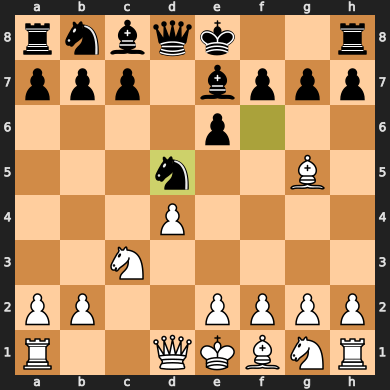

In [4]:
import chess

board = chess.Board()

for _ in range(10):
    if board.is_checkmate():
        break
    stockfish.set_fen_position(board.fen())

    board.push_uci(stockfish.get_best_move())
board

In [5]:
board.fen()

'rnbqk2r/ppp1bppp/4p3/3n2B1/3P4/2N5/PP2PPPP/R2QKBNR w KQkq - 0 6'

58
72


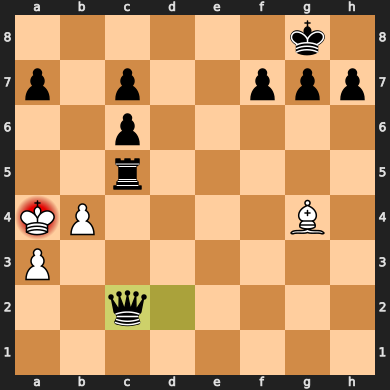

In [13]:
import chess

board = chess.Board()

hits = 0
eval_list = []

for move in moves:
    stockfish.set_fen_position(board.fen())
    eval = stockfish.get_evaluation()
    if eval['type'] == 'cp':
        eval_list.append(eval['value'])
    best_moves_dict = stockfish.get_top_moves(3)
    best_moves = [move['Move'] for move in best_moves_dict]
    if board.parse_san(move).uci() in best_moves:
        hits += 1
    board.push_san(move)
print(hits)
print(len(moves))
board

[37, 43, 42, 20, 18, 13, 7, -8, 15, 7, 3, 8, 13, -72, -66, -72, -65, -155, -171, -163, -145, -147, -143, -238, -208, -269, -289, -463, -511, -537, -503, -520, -464, -507, -520, -647, -626, -677, -679, -3550, -3504, -704, -3230, -794, -773, -737, -745, -3500, -3761, -3811, -3471]
-729.7843137254902


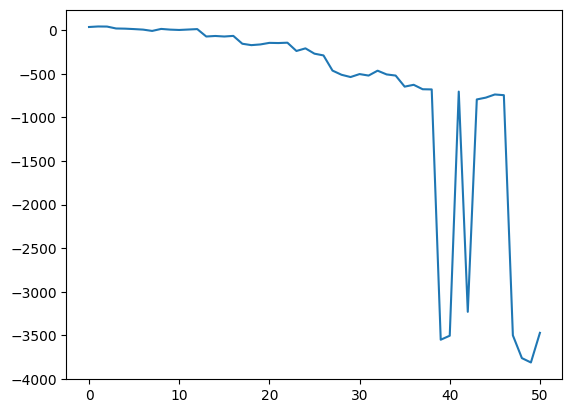

In [12]:
import numpy as np
from matplotlib import pyplot as plt
print(eval_list)
print(np.mean(eval_list))
plt.plot(eval_list)

In [103]:
board = chess.Board()
print(board.fen())
board.push_san('e4')
print(board.fen())
board.push_san('d5')
print(board.fen())
board.push_san('exd5')
print(board.fen())
board.push_san('Nc6')
print(board.fen().split()[0])
print(board)

rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1
rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq - 0 1
rnbqkbnr/ppp1pppp/8/3p4/4P3/8/PPPP1PPP/RNBQKBNR w KQkq - 0 2
rnbqkbnr/ppp1pppp/8/3P4/8/8/PPPP1PPP/RNBQKBNR b KQkq - 0 2
r1bqkbnr/ppp1pppp/2n5/3P4/8/8/PPPP1PPP/RNBQKBNR
r . b q k b n r
p p p . p p p p
. . n . . . . .
. . . P . . . .
. . . . . . . .
. . . . . . . .
P P P P . P P P
R N B Q K B N R


In [104]:
piece_to_onehot = {'r' :        [1,0,0,0,0,0,0,0,0,0,0,0],
                   'n' :        [0,1,0,0,0,0,0,0,0,0,0,0],
                   'b' :        [0,0,1,0,0,0,0,0,0,0,0,0],
                   'q' :        [0,0,0,1,0,0,0,0,0,0,0,0],
                   'k' :        [0,0,0,0,1,0,0,0,0,0,0,0],
                   'p' :        [0,0,0,0,0,1,0,0,0,0,0,0],
                   'R' :        [0,0,0,0,0,0,1,0,0,0,0,0],
                   'N' :        [0,0,0,0,0,0,0,1,0,0,0,0],
                   'B' :        [0,0,0,0,0,0,0,0,1,0,0,0],
                   'Q' :        [0,0,0,0,0,0,0,0,0,1,0,0],
                   'K' :        [0,0,0,0,0,0,0,0,0,0,1,0],
                   'P' :        [0,0,0,0,0,0,0,0,0,0,0,1],
                   'empty' :    [0,0,0,0,0,0,0,0,0,0,0,0]}
piece_to_token   = {'r' :        1,
                   'n' :        2,
                   'b' :        3,
                   'q' :        4,
                   'k' :        5,
                   'p' :        6,
                   'R' :        7,
                   'N' :        8,
                   'B' :        9,
                   'Q' :        10,
                   'K' :        11,
                   'P' :        12,
                   'empty' :    0}

def fen_to_network_input_one_hot(fen):
    encoded_board = []
    fen = fen.split()[0]
    for char in fen:
        if char in piece_to_onehot.keys():
            encoded_board.append(piece_to_onehot[char])
        elif char != '/':
            for _ in range(int(char)):
                encoded_board.append(piece_to_onehot['empty'])
    return encoded_board


def fen_to_network_input_tokenized(fen):
    encoded_board = []
    fen = fen.split()[0]
    for char in fen:
        if char in piece_to_token.keys():
            encoded_board.append(piece_to_token[char])
        elif char != '/':
            for _ in range(int(char)):
                encoded_board.append(piece_to_token['empty'])
    return encoded_board

In [105]:
tokenized_board = fen_to_network_input_tokenized(board.fen())
encoded_board = fen_to_network_input_one_hot(board.fen())
print(tokenized_board)
print(encoded_board)

[1, 0, 3, 4, 5, 3, 2, 1, 6, 6, 6, 0, 6, 6, 6, 6, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 12, 12, 12, 0, 12, 12, 12, 7, 8, 9, 10, 11, 9, 8, 7]
[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [106]:
type(encoded_board[0])

list

In [107]:
from torch import nn
import torch

embedding = nn.Embedding(13,3)

tokenized_board = torch.IntTensor(tokenized_board)

embedded_board = embedding(tokenized_board)
embedded_board.reshape(1,192)

tensor([[ 0.5213,  0.9718, -1.2769,  1.0917, -0.2722, -0.7481, -0.4275,  1.9218,
         -0.4813,  0.2515, -0.4342,  2.0043,  0.5446, -1.0132, -0.6668, -0.4275,
          1.9218, -0.4813,  0.8091, -2.0631,  0.0295,  0.5213,  0.9718, -1.2769,
          1.2929,  0.1549, -0.4698,  1.2929,  0.1549, -0.4698,  1.2929,  0.1549,
         -0.4698,  1.0917, -0.2722, -0.7481,  1.2929,  0.1549, -0.4698,  1.2929,
          0.1549, -0.4698,  1.2929,  0.1549, -0.4698,  1.2929,  0.1549, -0.4698,
          1.0917, -0.2722, -0.7481,  1.0917, -0.2722, -0.7481,  0.8091, -2.0631,
          0.0295,  1.0917, -0.2722, -0.7481,  1.0917, -0.2722, -0.7481,  1.0917,
         -0.2722, -0.7481,  1.0917, -0.2722, -0.7481,  1.0917, -0.2722, -0.7481,
          1.0917, -0.2722, -0.7481,  1.0917, -0.2722, -0.7481,  1.0917, -0.2722,
         -0.7481, -0.2710,  0.7409, -1.8613,  1.0917, -0.2722, -0.7481,  1.0917,
         -0.2722, -0.7481,  1.0917, -0.2722, -0.7481,  1.0917, -0.2722, -0.7481,
          1.0917, -0.2722, -